<a href="https://colab.research.google.com/github/YueunKim/Kriss_colab/blob/master/2_linear_regression_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

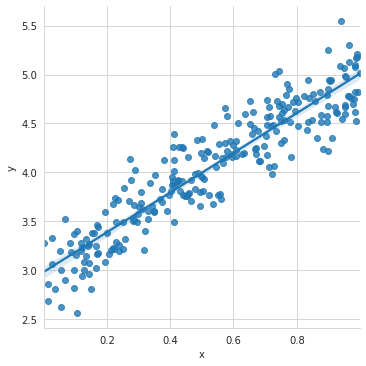

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd
%matplotlib inline

sns.set_style(style = 'whitegrid')
plt.rcParams["patch.force_edgecolor"] = True

m = 2 # slope
c = 3 # interceptm = 2 # slope
c = 3 # intercept

x = np.random.rand(256)

noise = np.random.randn(256) / 4

y = x * m + c + noise

df = pd.DataFrame()
df['x'] = x
df['y'] = y

sns.lmplot(x ='x', y ='y', data = df)

input_d, output_d  = 1, 1


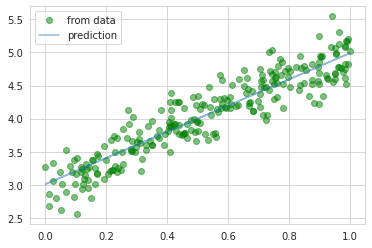

OrderedDict([('linear.weight', tensor([[1.9854]])), ('linear.bias', tensor([3.0064]))])


In [3]:
import torch
import torch.nn as nn
from torch.autograd import Variable

x_train = x.reshape(-1, 1).astype('float32')
y_train = y.reshape(-1, 1).astype('float32')

class LinearRegressionModel(nn.Module):
   def __init__(self, input_dim, output_dim):
      super(LinearRegressionModel, self).__init__()
      self.linear = nn.Linear(input_dim, output_dim)

   def forward(self, x):
      out = self.linear(x)
      return out

input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
print('input_d, output_d  = {}, {}'.format(input_dim, output_dim))

#model setting
model = LinearRegressionModel(input_dim, output_dim)
criterion = nn.MSELoss()

#optimizer setting
l_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr = l_rate)
epochs = 2000

#training the model
for epoch in range(epochs):
    epoch += 1
    
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #clear grads
    optimizer.zero_grad()
    
    #forward to get predicted values
    outputs = model.forward(inputs)
    loss = criterion(outputs, labels)
    loss.backward() #back props
    optimizer.step() #update the parameters
    #print('epoch {}, loss {}'.format(epoch, loss.data))

predicted = model.forward(Variable(torch.from_numpy(x_train))).data.numpy()

plt.plot(x_train, y_train, 'go', label='from data', alpha = .5)
plt.plot(x_train, predicted, label='prediction', alpha = .5)
plt.legend()
plt.show()
print(model.state_dict())
